# Procedures
1. Gaussian Filter
1. Threshholding
1. Enhance Contrast
    1. Histogram Equalization
    2. Adaptive Histogram Equalization(adaptive)
    3. Contrast Limited Adaptive Histogram Equalization(limited adaptive) (CLAHE)
1. Noise Reduction
1. HOG
1. LBP
1. Algorithms
    1. SVM
    2. CNN
    3. VGG-16
    4. RESNET
1. Evealuation
    1. Classification Accuracy
    2. Logarithmic Loss
    3. Confussion Matrix
    4. Area Under Curve
    5. F1 Score
    6. Mean Absolute Error
    7. Mean Square Error

### Necessary Imports

In [89]:
import json
from pathlib import Path
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import exposure
from skimage.filters import gaussian
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.feature import hog, local_binary_pattern

### Necessary Configs

In [90]:
with open('config.json') as file:
    config = json.load(file)

### Necessary Paths

In [91]:
train_ds_path = join(Path('__file__').parent.absolute(), 'datasets/train')
test_ds_path = join(Path('__file__').parent.absolute(), 'datasets/test')

### Necessary Functions

In [92]:
rgb2gray = lambda original: color.rgb2gray(original)
rgb = lambda original: color.gray2rgb(original)
read = lambda path: plt.imread(path)
img_red = lambda img: img[:, :, 0]
img_green = lambda img: img[:, :, 1]
img_blue = lambda img: img[:, :, 2]
size = lambda img: img.size
shape = lambda img: img.shape
img_flp_v = lambda img: np.flipud(img)
img_flip_h = lambda img: np.fliplr(img)
gaussian_filtr = lambda img: gaussian(img, multichannel=True)
img_hist_eq = lambda img: exposure.equalize_hist(img)
img_clahe = lambda img: exposure.equalize_adapthist(img, clip_limit=0.03)
img_denoise_tv = lambda img: denoise_tv_chambolle(img, multichannel=True)
img_denoise_bilateral = lambda img: denoise_bilateral(img, multichannel=True)
def show_img(img, title='Image', cmap_type = None):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
def show_hist(img, color='all', bins=256, suptitle='histogram of various color channels'):
    def show(arr, title, color):
        plt.hist(arr, bins=bins, color=color)
        plt.title(title)
    if color == 'all':
        plt.subplot(1, 3, 1)
        show(img_red(img).flatten(), 'red channel', 'red')
        plt.subplot(1, 3, 2)
        show(img_green(img).flatten(), 'green channel', 'green')
        plt.subplot(1, 3, 3)
        show(img_blue(img).flatten(), 'blue channel', 'blue')
    if color == 'r':
        show(img_red(img).flatten(), 'red channel', 'red')
    if color == 'g':
        show(img_green(img).flatten(), 'green channel', 'green')
    if color == 'b':
        show(img_blue(img).flatten(), 'blue channel', 'blue')
    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()
def compare_img(original, img2, scnd_img_title, suptitle='comparing original and other image', cmap=None):
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap=cmap)
    plt.title('original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=cmap)
    plt.title(scnd_img_title)
    plt.axis('off')
    plt.tight_layout()
    plt.suptitle(suptitle)
    plt.show()
def load_img(_type='train'):
    ds_path = train_ds_path if  _type == 'train' else test_ds_path
    for file in listdir(ds_path):
        img_path = join(ds_path, file)
        if isfile(img_path): yield read(img_path)
        else: 
            for _file in listdir(join(ds_path, file)):
                img_path = join(ds_path, file, _file)
                if isfile(img_path): yield read(img_path)

### Feature Extraction Algorithms
- `hog_f`
<br>parameters: *image object*
<br>returns: *HOG descripter for the image*, *A visualization of HOG image*
>*for returning both of the values, make sure `feature_vector` and `visualize` set to `True`*
- `lbp_f`
<br>parameters: *image object*
<br>returns: *LBP Image*

In [93]:
hog_f = lambda img: hog(img, orientations=config['hog']['orientations'], pixels_per_cell=tuple(config['hog']['pixels_per_cell']), cells_per_block=tuple(config['hog']['cells_per_block']), block_norm=config['hog']['block_norm'], visualize=config['hog']['visualize'], transform_sqrt=config['hog']['transform_sqrt'], feature_vector=config['hog']['feature_vector'], multichannel=config['hog']['multichannel'])

lbp_f = lambda img: local_binary_pattern(rgb2gray(img), P=config['lbp']['P'], R=config['lbp']['R'], method=config['lbp']['method'])

### Classification Algorithms

### Evealuation Techniques

### Working Pipeline

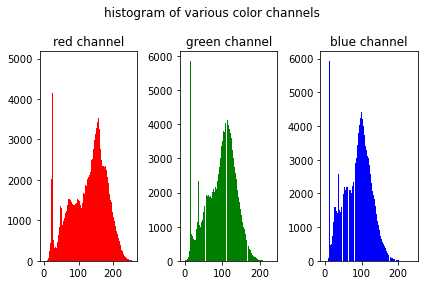

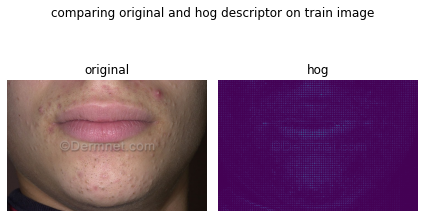

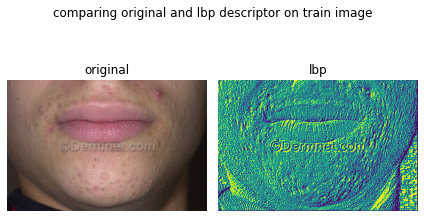

In [94]:
for img in load_img():
    show_hist(img)
    compare_img(img, hog_f(img)[1], 'hog', 'comparing original and hog descriptor on train image')
    compare_img(img, lbp_f(img), 'lbp', 'comparing original and lbp descriptor on train image')
    break
# for img in load_img('test'):
#     compare_img(img, hog_f(img)[1], 'hog', 'comparing original and hog descriptor on train image')
#     compare_img(img, lbp_f(img), 'lbp', 'comparing original and lbp descriptor on train image')
#     break